## Prueba práctica 1

Se buscar encontrar la eficiencia de la generación de números pseudo-aletorios a través de los métodos de cuadrados medios y congruencia lineal, para ello se debe seguir el siguiente proceso:

1. A traves de la misma api generar una semilla diferente. 

In [207]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import psutil

%matplotlib inline

#Tabla informativa de los números aleatorios
df_cuadrados_medios = pd.DataFrame(columns=("Iteración","Xn","Xn*Xn", "Longitud", "Ui", "Rn"))
df_congruencias_lineales = pd.DataFrame(columns = ('Xn','Rn'))

Ui = "0"
xn = 0
memoria_usada = str(psutil.virtual_memory()[3])
memoria_usada = memoria_usada[0:3]

def calcular_cuadrados_medios(iteraciones):
    global Ui
    primero = -1
    repetido = False
    
    #Semilla del número aleatorio
    semilla = int(memoria_usada)

    #Largo del número aleatorio
    largo = 0

    Xn2 = 0
    si = 0
    sf = 0
    for i in range(0,iteraciones):
        df_cuadrados_medios.loc[i,"Iteración"] = i
        df_cuadrados_medios.loc[i,"Xn"] = semilla
        Xn2 = semilla*semilla
        df_cuadrados_medios.loc[i,"Xn*Xn"] = Xn2
        largo = len(str(Xn2))
        df_cuadrados_medios.loc[i,"Longitud"] = largo
        Ui = str(Xn2)
        si = int((largo/2)-(largo/4))
        sf = int((largo/2)+(largo/4))
        Ui = Ui[si:sf]
        df_cuadrados_medios.loc[i,"Ui"] = Ui
        df_cuadrados_medios.loc[i,"Rn"] = int(Ui)/10000
        semilla =  int(Ui)+100
        if i != 0 and repetido == False:
            for it in range(0, i):
                if semilla == df_cuadrados_medios.loc[it,"Xn"]:
                    print("Se ha encontrado un repetido (", semilla,
                          ") en las posiciones: ",it," y ",i)
                    repetido = True
        
calcular_cuadrados_medios(1)

SEMILLA_CUADRADOS_MEDIOS =  int(Ui)

def calcular_congruencias_lineales(iteraciones):
    global xn
    repetido = False
    
    a = int(memoria_usada)
    c = 11
    m = int(math.pow(2,9) - 1)
    x0 = 485

    for i in range(0, iteraciones):
        xn = (a*x0 + c) % m; 
        rn = xn/m
        df_congruencias_lineales.loc[i,["Xn","Rn"]] = xn, rn
        x0 = xn
        if i != 0 and repetido == False:
            for it in range(0, i):
                if rn == df_congruencias_lineales.loc[it,"Rn"]:
                    print("Se ha encontrado un repetido (", xn,
                          ") en las posiciones: ",it," y ",i)
                    repetido = True
calcular_congruencias_lineales(1)
SEMILLA_CONGRUENCIAS_LINEALES = xn;

print("Semilla para el método de cuadrados medios: ",SEMILLA_CUADRADOS_MEDIOS)
print("Semilla para el método de congruencia lineal: ",SEMILLA_CONGRUENCIAS_LINEALES)

Semilla para el método de cuadrados medios:  512
Semilla para el método de congruencia lineal:  491


2. Encontrar el numero de iteraciones hasta que se repita uno de sus datos.
3. Generar 100 simulaciones con diferentes semillas.

In [208]:
calcular_cuadrados_medios(100)
df_cuadrados_medios

Se ha encontrado un repetido ( 134 ) en las posiciones:  14  y  30


Iteración   Xn   Xn*Xn Longitud   Ui      Rn
0          0  807  651249        6  512  0.0512
1          1  612  374544        6  745  0.0745
2          2  845  714025        6  140   0.014
3          3  240   57600        5   76  0.0076
4          4  176   30976        5   09  0.0009
..       ...  ...     ...      ...  ...     ...
95        95  143   20449        5   04  0.0004
96        96  104   10816        5   08  0.0008
97        97  108   11664        5   16  0.0016
98        98  116   13456        5   34  0.0034
99        99  134   17956        5   79  0.0079

[100 rows x 6 columns]

In [209]:
calcular_congruencias_lineales(100)
df_congruencias_lineales

Se ha encontrado un repetido ( 491 ) en las posiciones:  0  y  9


Xn         Rn
0   491   0.960861
1   223   0.436399
2   100   0.195695
3   484   0.947162
4   195   0.381605
..  ...        ...
95  499   0.976517
96   36  0.0704501
97  447   0.874755
98  485   0.949119
99  491   0.960861

[100 rows x 2 columns]

4. Generar un histograma con el resultado obtenidos por cada método.

<Figure size 432x288 with 0 Axes>

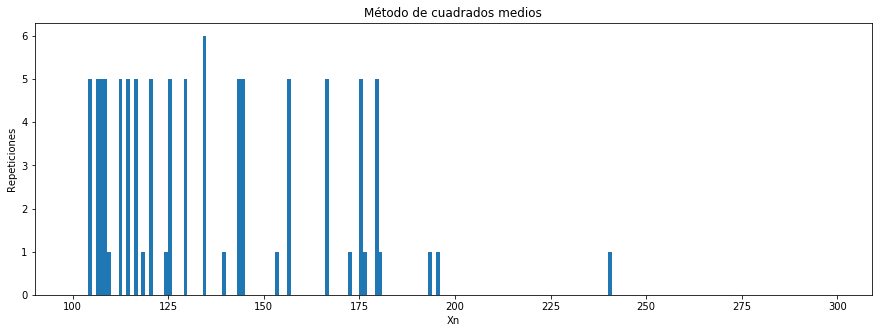

In [210]:
cuadrados_medios = []
cuadrados_medios = df_cuadrados_medios.loc[:,'Xn']

fig = plt.figure(facecolor='w')
fig = plt.figure(figsize=(15,5))
plt.hist(cuadrados_medios, range(100,300))
plt.title("Método de cuadrados medios")
plt.ylabel('Repeticiones');
plt.xlabel('Xn');
plt.show()

<Figure size 432x288 with 0 Axes>

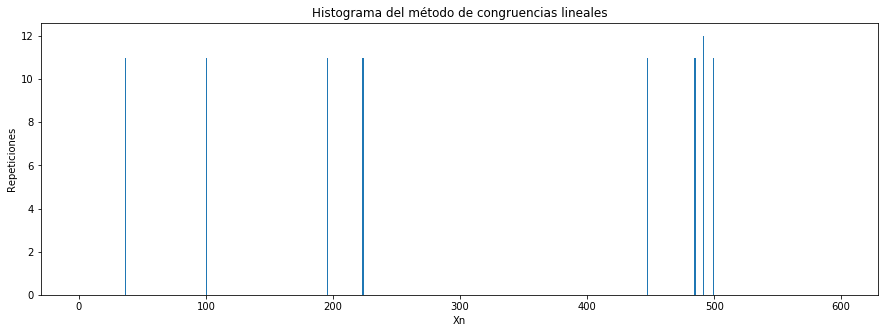

In [211]:
congruencias_lineales = []
congruencias_lineales = df_congruencias_lineales.loc[:,'Xn']
rango = [0.0]
for x in range(1,100):
    rango.append(round(rango[x-1]+0.01,2))

fig = plt.figure(facecolor='w')
fig = plt.figure(figsize=(15,5))
plt.hist(congruencias_lineales, range(0,600))
plt.title("Histograma del método de congruencias lineales")
plt.ylabel('Repeticiones');
plt.xlabel('Xn');
plt.show()

5. Agregar sus conclusiones, opiniones y recomendaciones

# Conclusiones
Dentro del presente análisis se puede visualizar la importancia de la generación de números randómicos en procesos de simulación, ya que sin estos, la simulaciones vendrían a ser la materialización de un mero ajuste de valores determinísticos que el propio humano definiría.
# Opiniones
Para lograr buenos resultados de un proyecto es vital conocer los componentes que intervienen en el desarrollo del mismo, por lo tanto para realizar simulaciones que pueden ayudar en distintos ámbito,s el conocimiento proporcionado por el docente es el más acertado y se precisa perfeccionarlo si se planea a futuro seguir concretando tareas que se encuentren dentro del campo de la simulación.
# Recomendaciones
Un análisis más a fondo de los parámetros que ofrezcan mejores resultados al genenrar números pseudoaleatorios sería ideal, ya que son de importancia vital para esta tarea.